In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from mendelian_concordance_functions import *

/vf/users/fordmk/ImmunoTyper-expansion-methods/1KGP_Trios/immunotyper-analysis/mendelian_concordance_functions.py:499: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().upper() for label in ax.get_xticklabels()])


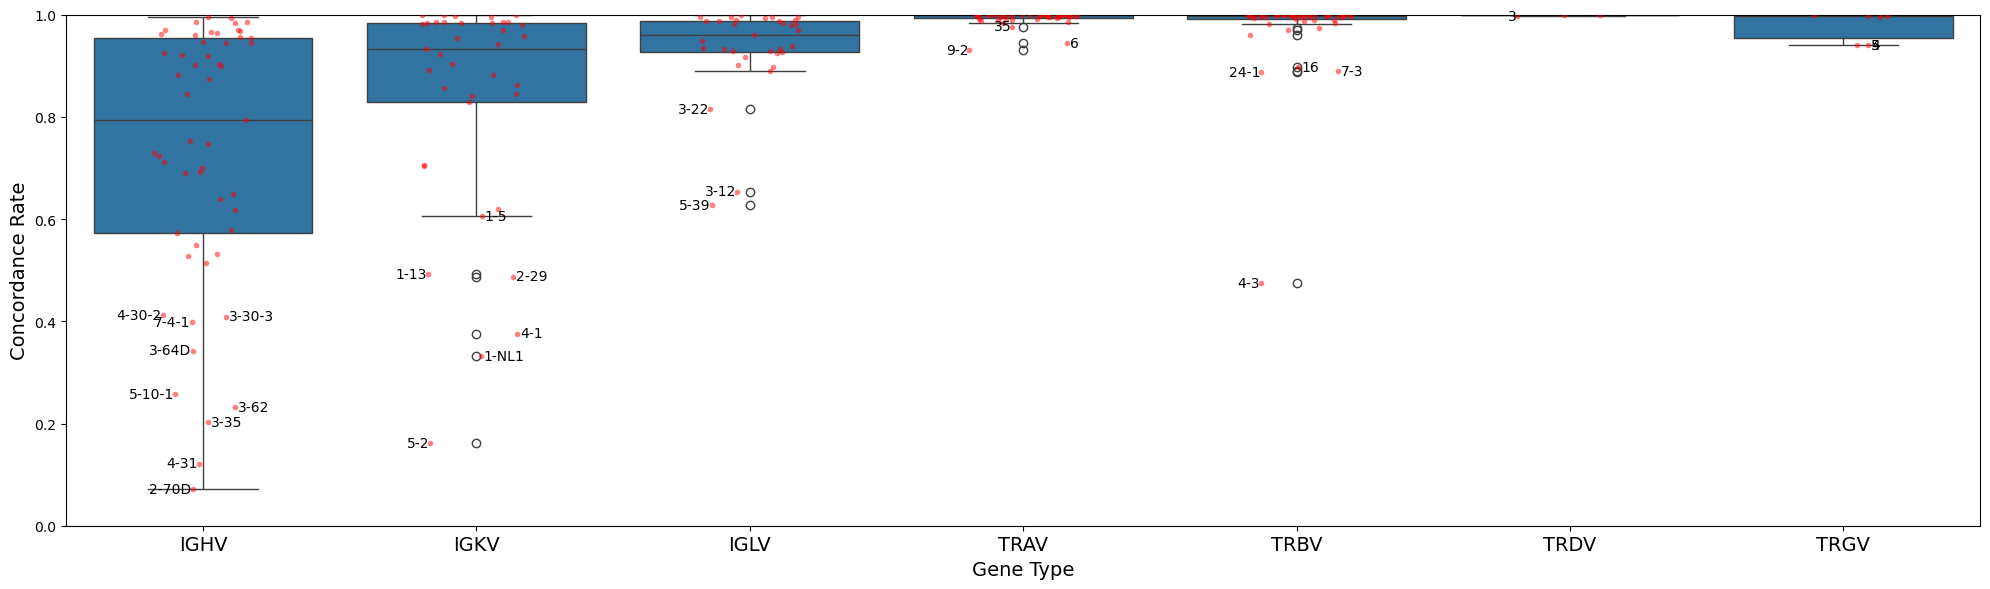

In [5]:
gene_types = ['ighv','igkv','iglv','trav','trbv','trdv','trgv']
genotype_dirs = [f'../immunotyper-output/{x.lower()}/' for x in gene_types]
trio_file = '../trio_samples.txt'
trio_df = pd.read_csv(trio_file, sep=' ')
fig, ax = plot_gene_concordance_distribution(get_gene_concordance_data(gene_types, genotype_dirs, trio_df))
plt.savefig('figures/gene_concordance_distribution.png', dpi=1100, bbox_inches='tight')
plt.show()

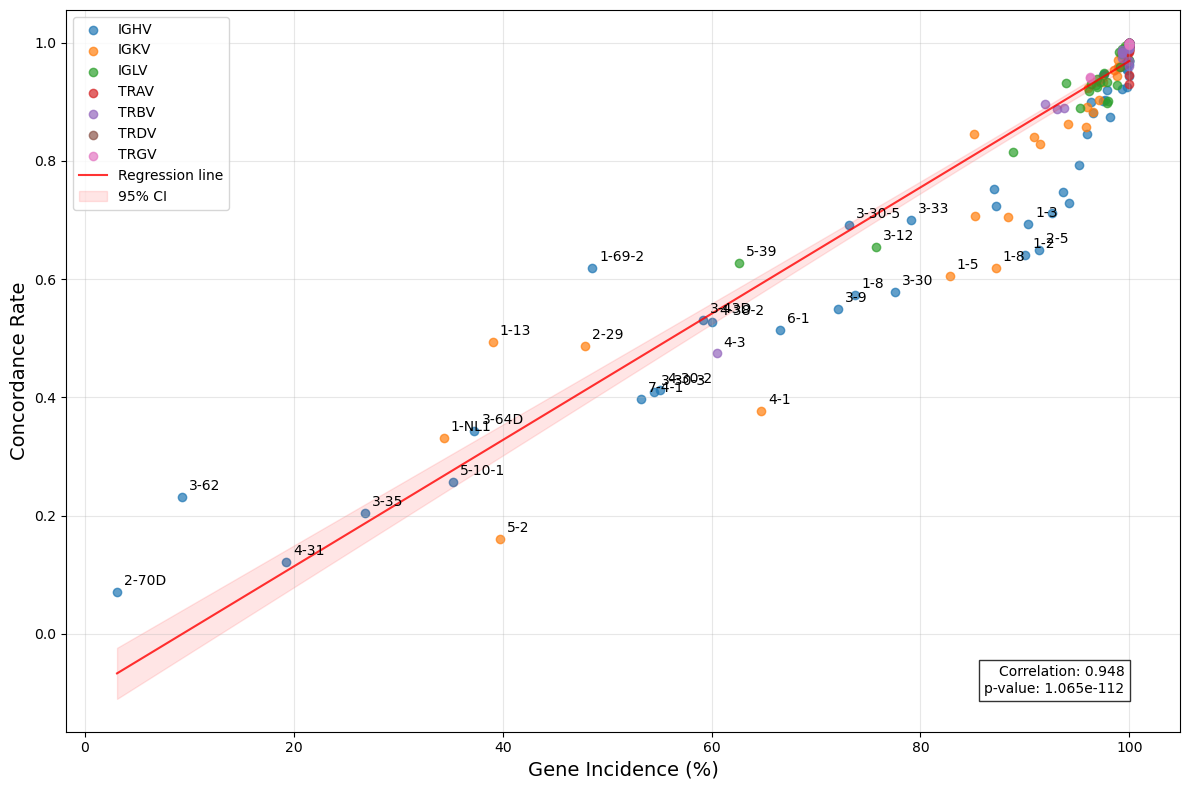

In [6]:
fig, ax, concordance_df = analyze_gene_incidence(get_gene_concordance_data(gene_types, genotype_dirs, trio_df))
plt.savefig('figures/gene_incidence_concordance_association.png', dpi=1100, bbox_inches='tight')
plt.show()

/vf/users/fordmk/ImmunoTyper-expansion-methods/1KGP_Trios/immunotyper-analysis/mendelian_concordance_functions.py:656: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label.get_text().upper() for label in ax.get_xticklabels()])


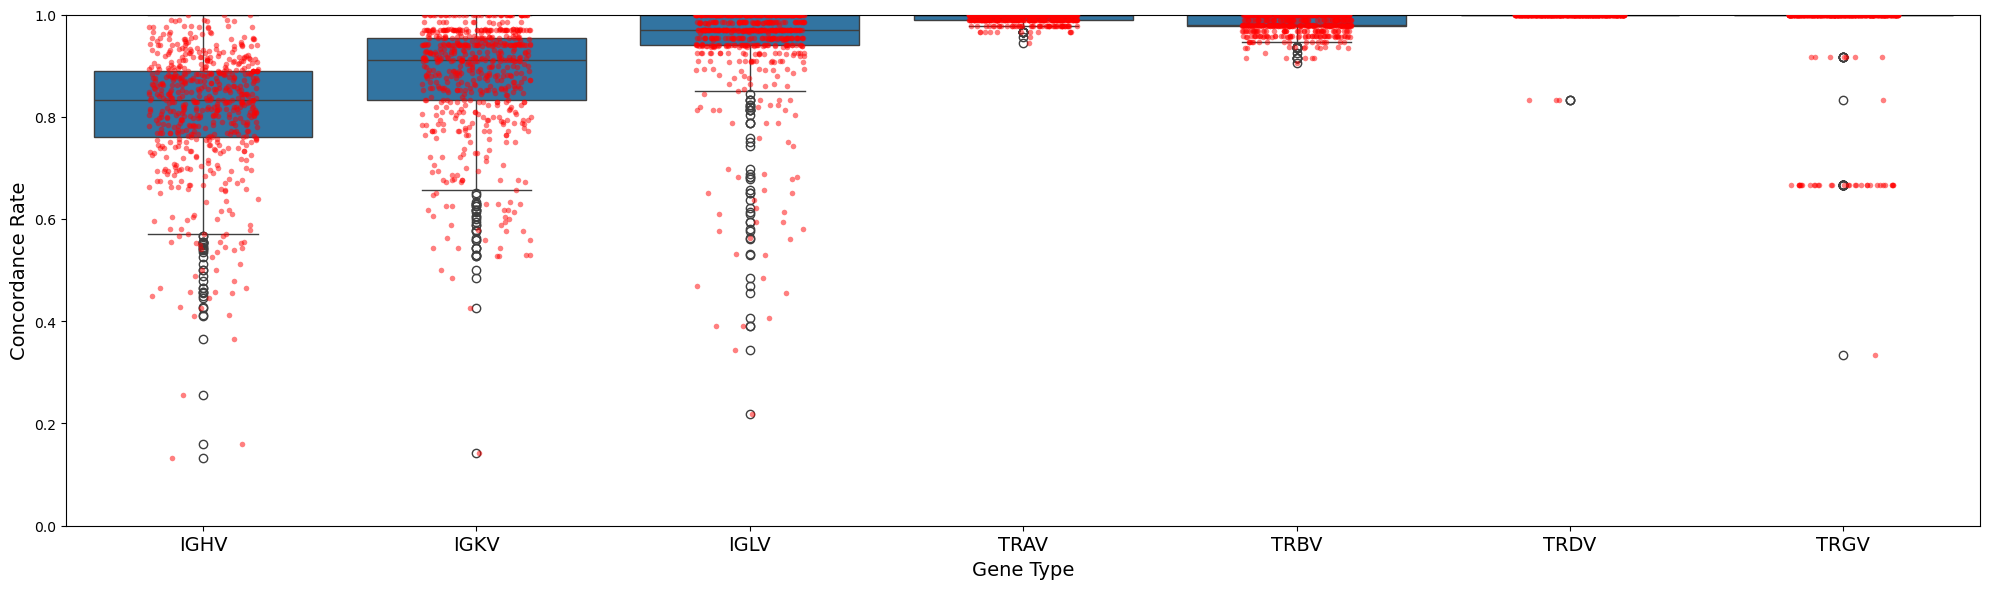

In [7]:
trio_concordance_data = get_trio_concordance_data(gene_types, genotype_dirs, trio_df)
fig, ax = plot_trio_concordance_distribution(trio_concordance_data)
plt.savefig('figures/trio_concordance_distribution.png', dpi=1100, bbox_inches='tight')
plt.show()

In [8]:
genotype_df = load_genotype_data(f'../immunotyper-output/ighv/', 'ighv')
trio_concordance, trio_concordance_rates = calculate_trio_concordance(trio_df, genotype_df)

In [9]:
trio_concordance, trio_concordance_rates = calculate_trio_concordance(trio_df, genotype_df)

In [10]:
genotype_df = load_genotype_data(genotype_dirs[0], 'ighv')

sample_metadata_df = load_sample_metadata(genotype_dirs[0], 'ighv', high_coverage_index="..//1000G_2504_high_coverage.sequence.index", related_index="../1000G_698_related_high_coverage.sequence.index")

fig, ax_main, stats_df = plot_concordance_by_population(trio_concordance_rates, sample_metadata_df)
plt.savefig('figures/population_concordance.png', dpi=1100, bbox_inches='tight')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '..//1000G_2504_high_coverage.sequence.index'

In [ ]:
sample_stats = load_sample_metadata("../immunotyper-output/ighv/", "ighv", "../1000G_2504_high_coverage.sequence.index", "../1000G_698_related_high_coverage.sequence.index")

trio_concordance, trio_concordance_rates = calculate_trio_concordance(trio_df, genotype_df)

fig = plot_concordance_vs_read_variation(trio_concordance_rates, sample_stats, method='pairwise')
plt.savefig('figures/read_recruitment_difference_vs_concordance.png', dpi=1100, bbox_inches='tight')
plt.show()

In [ ]:
sample_stats = load_sample_metadata("../immunotyper-output/ighv/", "ighv", "../1000G_2504_high_coverage.sequence.index", "../1000G_698_related_high_coverage.sequence.index")

trio_concordance, trio_concordance_rates = calculate_trio_concordance(trio_df, genotype_df)

fig = plot_concordance_vs_child_parent_reduction(trio_concordance_rates, sample_stats, )
plt.savefig('figures/read_recruitment_change_vs_concordance.png', dpi=1100, bbox_inches='tight')
plt.show()

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20, 6))
axes[0].text(-0.1, 1.05, 'a', transform=axes[0].transAxes, 
         fontsize=16, fontweight='bold', va='top')
axes[1].text(-0.1, 1.05, 'b', transform=axes[1].transAxes, 
         fontsize=16, fontweight='bold', va='top')
sample_stats = load_sample_metadata("../immunotyper-output/iglv/", "iglv", "../1000G_2504_high_coverage.sequence.index", "../1000G_698_related_high_coverage.sequence.index")

trio_concordance, trio_concordance_rates = calculate_trio_concordance(trio_df, load_genotype_data(genotype_dirs[2], 'iglv'))

fig, ax = plot_concordance_vs_child_parent_reduction(trio_concordance_rates, sample_stats, ax=axes[0])


sample_stats = load_sample_metadata("../immunotyper-output/igkv/", "igkv", "../1000G_2504_high_coverage.sequence.index", "../1000G_698_related_high_coverage.sequence.index")

trio_concordance, trio_concordance_rates = calculate_trio_concordance(trio_df, load_genotype_data(genotype_dirs[1], 'igkv'))



_, ax = plot_concordance_vs_child_parent_reduction(trio_concordance_rates, sample_stats, ax=axes[1])

plt.savefig('figures/read_recruitment_change_vs_concordance-iglv-igkv.png', dpi=1100, bbox_inches='tight')
# plt.show()
fig.show()

In [ ]:
sample_stats = load_sample_metadata("../immunotyper-output/igkv/", "igkv", "../1000G_2504_high_coverage.sequence.index", "../1000G_698_related_high_coverage.sequence.index")

trio_concordance, trio_concordance_rates = calculate_trio_concordance(trio_df, load_genotype_data(genotype_dirs[1], 'igkv'))

fig = plot_concordance_vs_child_parent_reduction(trio_concordance_rates, sample_stats)
plt.savefig('figures/read_recruitment_change_vs_concordance.png', dpi=1100, bbox_inches='tight')
plt.show()

In [ ]:
from plot_gene_distances_relationships import *

In [ ]:
distances, alleles, consensus_seqs, sequences = calculate_aligned_distances("IGHV-IMGT-allele-db-aligned.fasta")

# 4. Analyze centroid distances
# Calculate centroid distances and correlations
centroid_analysis = analyze_centroid_distances(
    distances, 
    alleles, 
    consensus_seqs,
    sequences,
    trio_concordance,
    centroid_threshold=3
)

# Create and save the plots
fig = plot_centroid_concordance_relationships(centroid_analysis)
plt.show()

In [ ]:
gene_metrics = calculate_gene_distance_metrics(distance_matrix, allele_list)

# 4. Analyze the relationships between distances and concordance
analysis_df, correlation_stats = analyze_concordance_vs_distances(gene_metrics, trio_concordance)

# 5. Create the visualization
fig = plot_distance_concordance_analysis(analysis_df, correlation_stats)
plt.show()

# 6. Print the correlation statistics
print("\nCorrelation Statistics:")
print(correlation_stats.sort_values('correlation', ascending=False))